In [ ]:
!unzip "/content/drive/MyDrive/plant_dataset_split - Copy.zip" -d /content/dataset

Archive:  /content/drive/MyDrive/plant_dataset_split - Copy.zip
replace /content/dataset/plant_dataset_split - Copy/test/Apple___Apple_scab/image (1000).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
img_size = (64, 64)
batch_size = 16
train_path = '/content/dataset/plant_dataset_split - Copy/train'
val_path = '/content/dataset/plant_dataset_split - Copy/val'
test_path = '/content/dataset/plant_dataset_split - Copy/test'


In [12]:
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',  # 'sparse' for numeric labels
    shuffle=False
)

val_data = val_gen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_data = test_gen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)


Found 49179 images belonging to 39 classes.
Found 9213 images belonging to 39 classes.
Found 3094 images belonging to 39 classes.


In [13]:
def generator_to_array(generator):
    X = []
    y = []
    for _ in tqdm(range(len(generator))):  # Iterate over all batches
        X_batch, y_batch = next(generator)
        X.append(X_batch)
        y.append(y_batch)
    X = np.vstack(X)
    y = np.hstack(y)
    return X.reshape(X.shape[0], -1), y  # Flatten


In [14]:
X_train, y_train = generator_to_array(train_data)
X_val, y_val = generator_to_array(val_data)
X_test, y_test = generator_to_array(test_data)

print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)


100%|██████████| 194/194 [00:02<00:00, 84.42it/s]

Train shape: (49179, 12288)
Val shape: (9213, 12288)
Test shape: (3094, 12288)


In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [17]:
y_val_pred = rf.predict(X_val)
print("Validation Results:")
print(classification_report(y_val, y_val_pred))

Validation Results:
              precision    recall  f1-score   support

         0.0       0.53      0.33      0.41       150
         1.0       0.66      0.52      0.58       150
         2.0       0.69      0.47      0.56       150
         3.0       0.67      0.57      0.61       246
         4.0       0.86      0.74      0.79       171
         5.0       0.74      0.73      0.73       225
         6.0       0.68      0.44      0.53       157
         7.0       0.89      0.52      0.66       150
         8.0       0.40      0.27      0.32       150
         9.0       0.98      0.99      0.99       178
        10.0       0.48      0.63      0.54       150
        11.0       0.84      0.89      0.86       174
        12.0       0.55      0.46      0.50       177
        13.0       0.67      0.70      0.68       207
        14.0       0.82      0.77      0.79       161
        15.0       0.55      0.47      0.51       150
        16.0       0.70      0.92      0.79       826
       

In [18]:
y_test_pred = rf.predict(X_test)
print("Test Results:")
print(classification_report(y_test, y_test_pred))

Test Results:
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        50
         1.0       0.60      0.64      0.62        50
         2.0       0.70      0.56      0.62        50
         3.0       0.58      0.53      0.55        83
         4.0       0.85      0.81      0.83        58
         5.0       0.79      0.79      0.79        76
         6.0       0.67      0.44      0.53        54
         7.0       0.86      0.48      0.62        50
         8.0       0.34      0.24      0.28        50
         9.0       0.97      1.00      0.98        61
        10.0       0.55      0.60      0.57        50
        11.0       0.81      0.86      0.84        59
        12.0       0.61      0.59      0.60        59
        13.0       0.79      0.71      0.75        70
        14.0       0.83      0.78      0.80        55
        15.0       0.60      0.50      0.54        50
        16.0       0.72      0.92      0.81       276
        17.0 

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_val, y_val_pred)


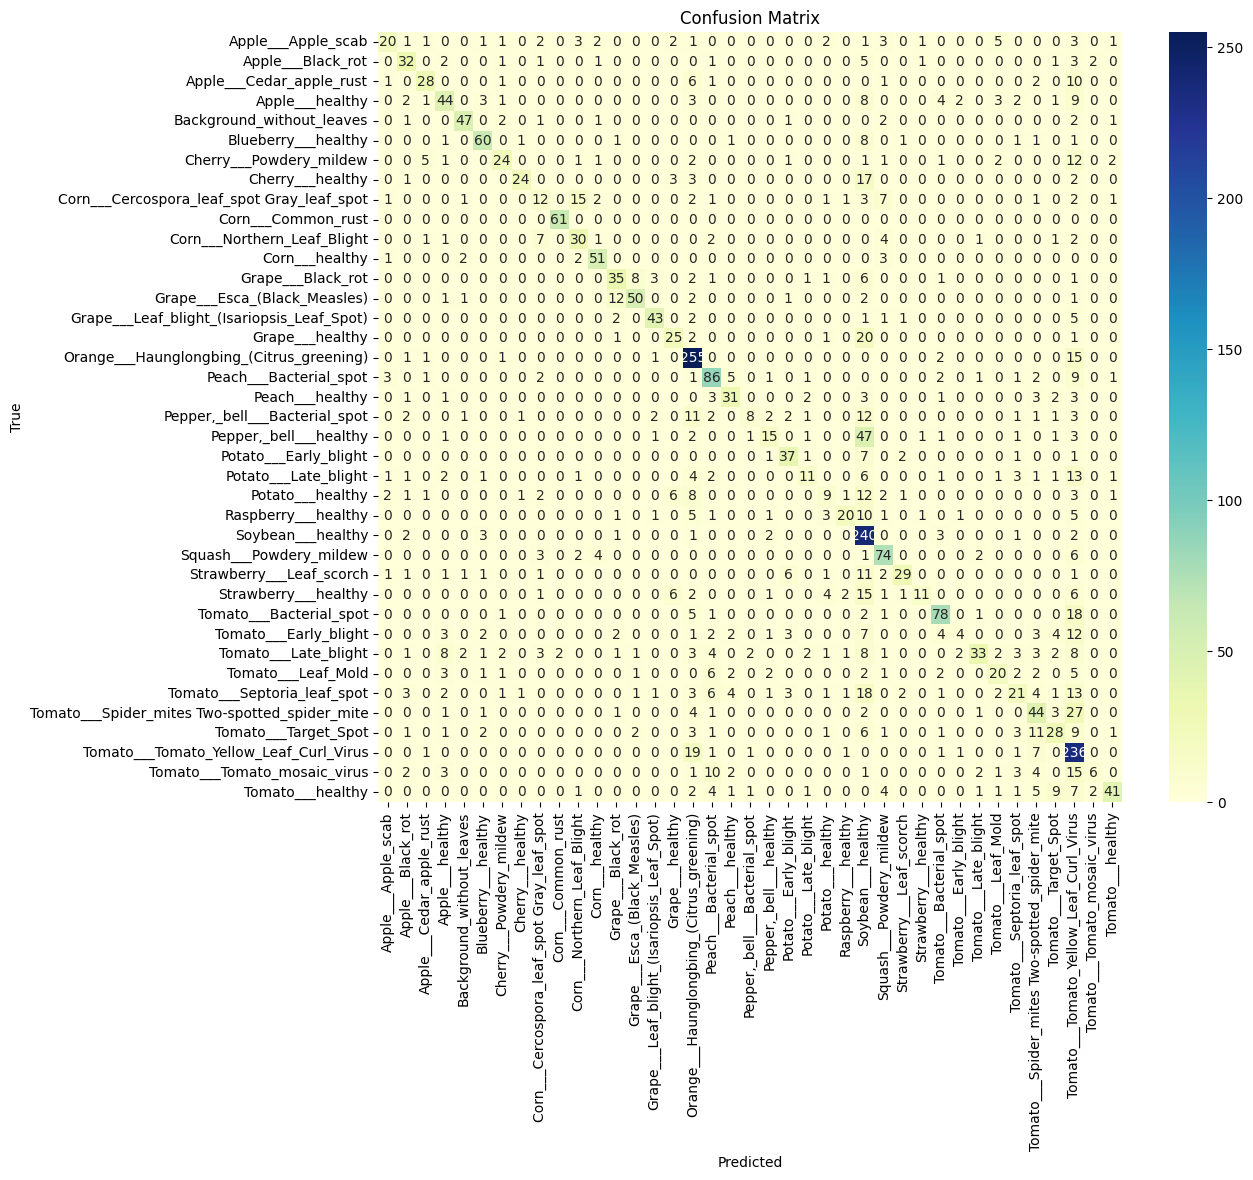

In [35]:
class_indices = train_data.class_indices
class_names = list(class_indices.keys())
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
